# Predict survival on the Titanic

#### Description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Importing the Data

In [2]:
titanic_train_df = pd.read_csv("data/train.csv") 
titanic_test_df = pd.read_csv("data/test.csv")
                               
                               

## Data Exploration and Analysis

In [3]:
titanic_train_df.shape

(891, 12)

In [4]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Individual column data exploration

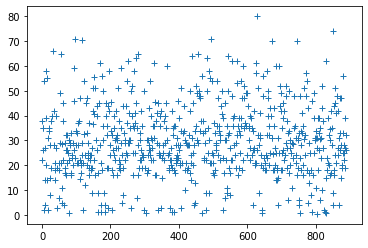

In [8]:
age = titanic_train_df['Age']
plt.plot(age,'+')

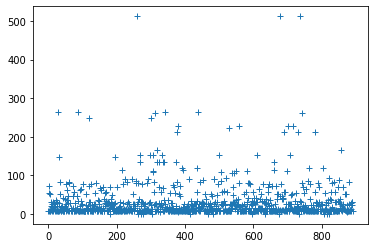

In [9]:
fare=titanic_train_df['Fare']
plt.plot(fare,'+')

In [10]:
def plotBarGraph(data_variable):
    """ plot a bar graph of the data_variable"""
    
    #obtain the column 
    data_field = titanic_train_df[data_variable] 
    
    #counts the number of occurence in a category i.e the frequency
    data_field_count = data_field.value_counts() 
    
    #plot the graph i.e visualization
    plt.figure(figsize = (9,3))
    plt.bar(data_field_count.index, data_field_count)
    plt.xticks(data_field_count.index,data_field_count.index.values)
    plt.title(data_variable)
    plt.ylabel("Frequency")
    plt.show()
    
    #print category and frequency
    print ("{}: \n {}".format(data_variable,data_field_count))
    
    
    

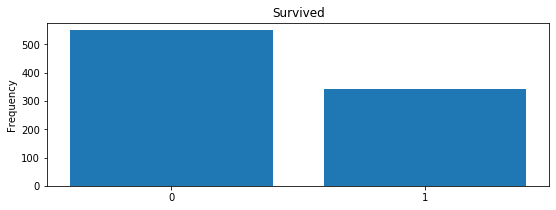

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


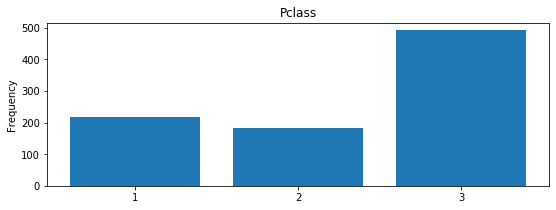

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


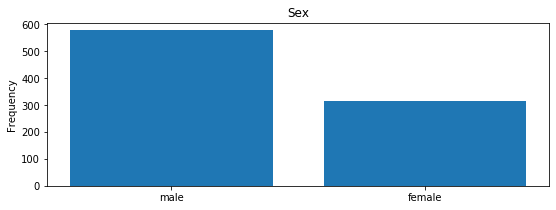

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


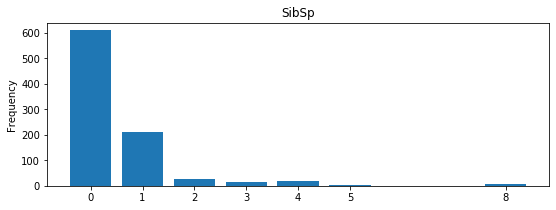

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


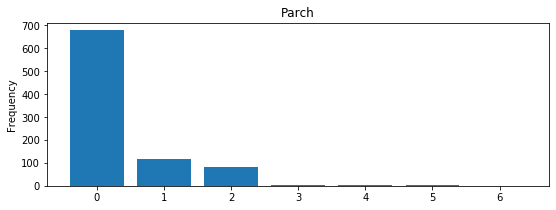

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


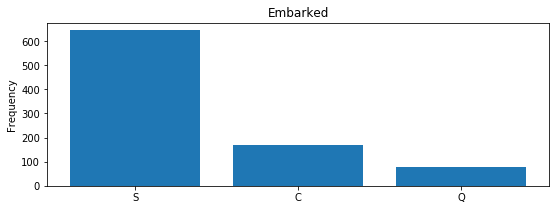

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
cat_variables =["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

for i in cat_variables:
    plotBarGraph(i)

### Categorical Data Exploration

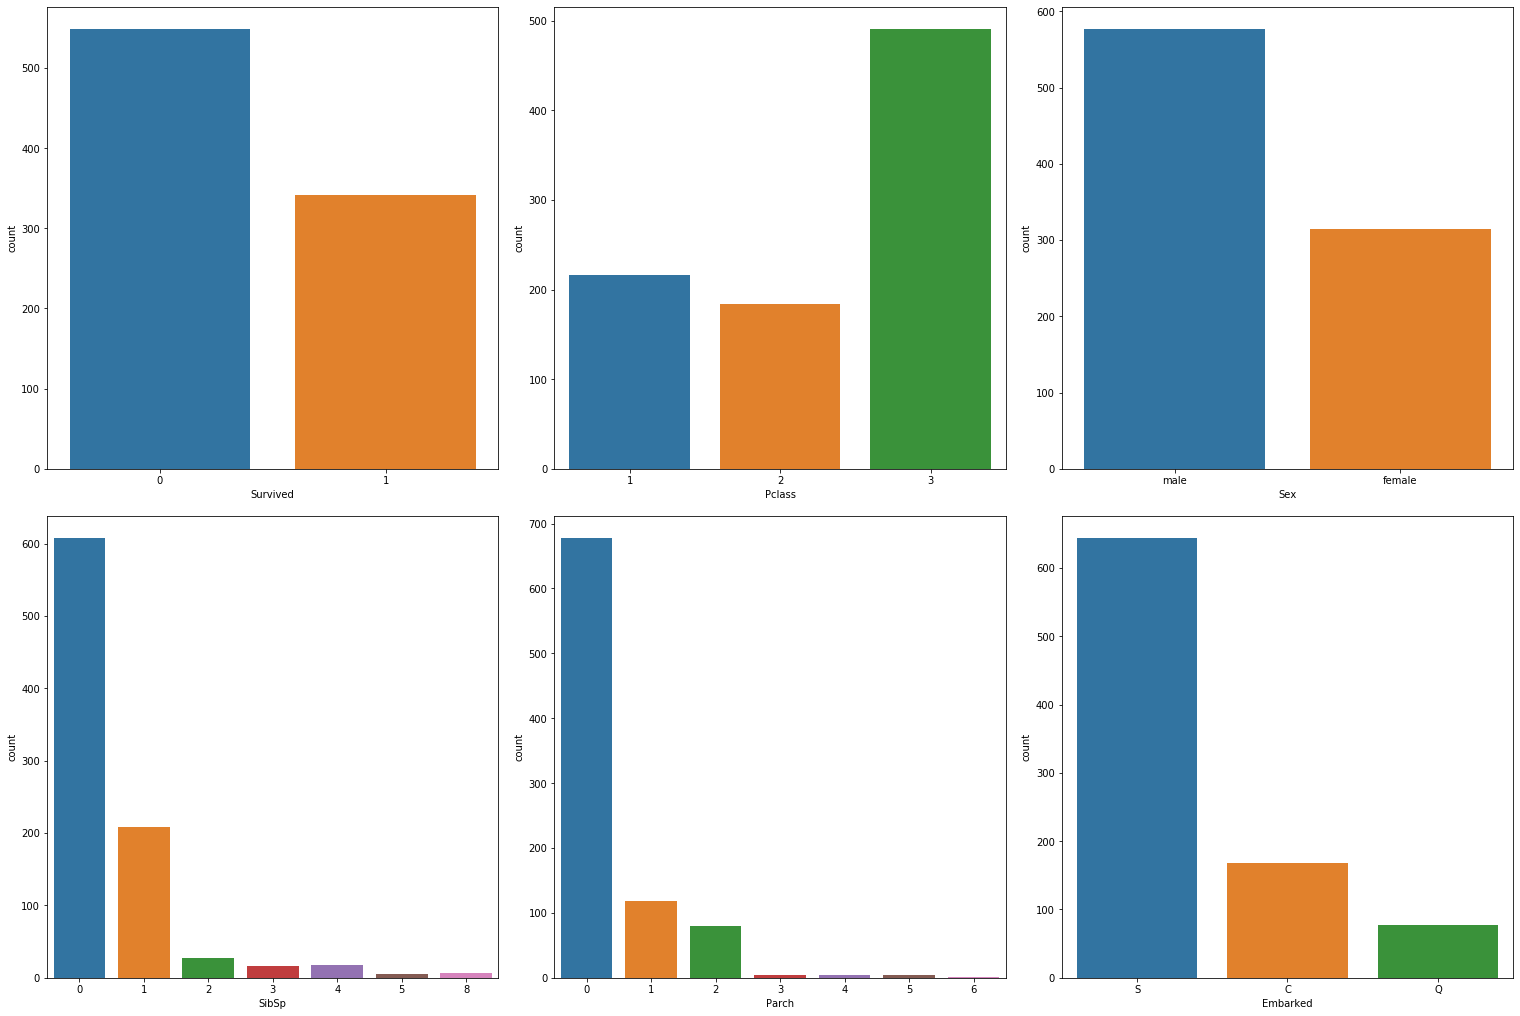

In [12]:
cat_variables =["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
num_plots = len(cat_variables)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(cat_variables):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=titanic_train_df, ax=axs[row][pos])

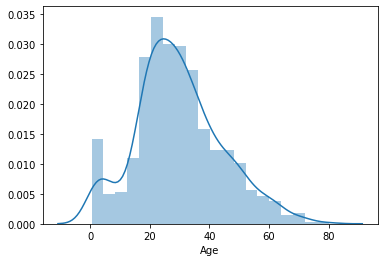

In [13]:
sns.distplot(titanic_train_df["Age"], )

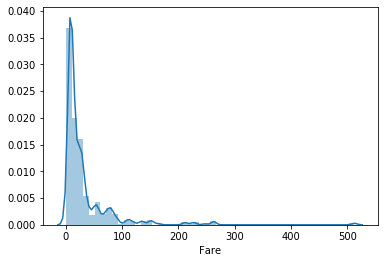

In [14]:
sns.distplot(titanic_train_df["Fare"], )

### Visualizing Multiple Variables

#### categorical Variables

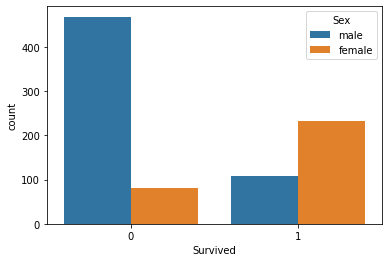

In [15]:
sns.countplot(x="Survived", data=titanic_train_df, hue="Sex")

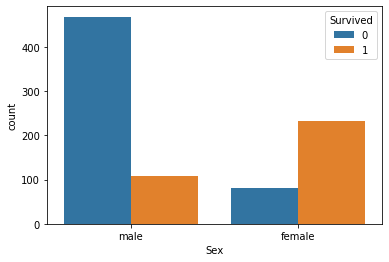

In [16]:
sns.countplot(x="Sex", data=titanic_train_df, hue="Survived")

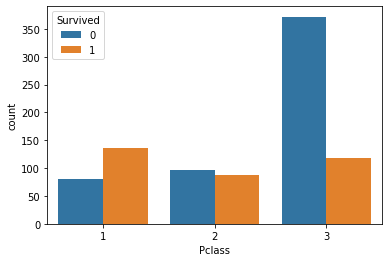

In [17]:
sns.countplot(x="Pclass", data=titanic_train_df, hue="Survived")

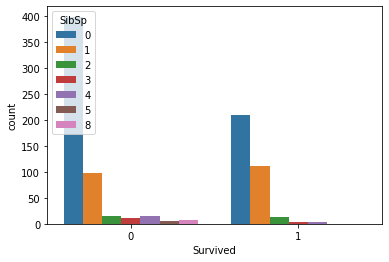

In [18]:
sns.countplot(x="Survived", data=titanic_train_df, hue="SibSp")

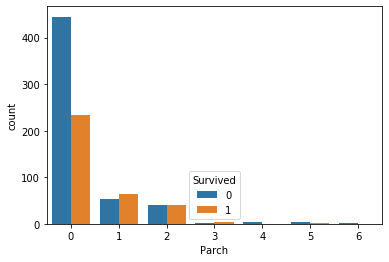

In [19]:
sns.countplot(x="Parch", data=titanic_train_df, hue="Survived")

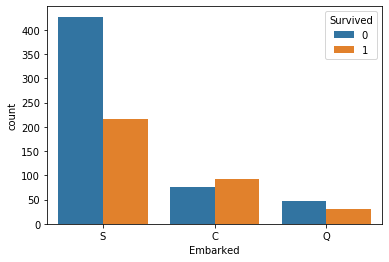

In [20]:
sns.countplot(x="Embarked", data=titanic_train_df, hue="Survived")

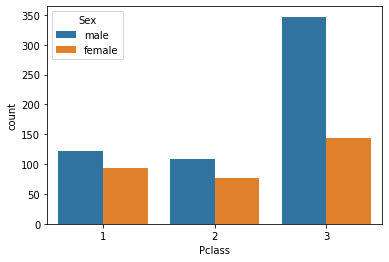

In [21]:
sns.countplot(x="Pclass", data=titanic_train_df, hue="Sex")

### numerical jointplots

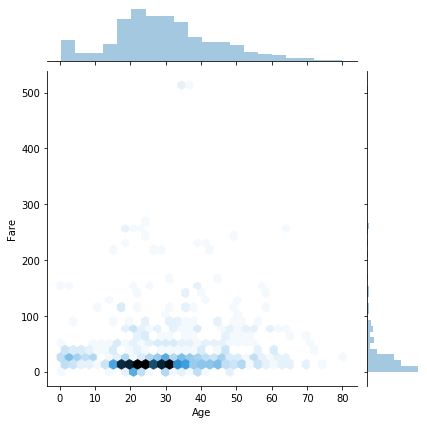

In [22]:
sns.jointplot(x='Age', y="Fare", data=titanic_train_df, kind="hex")

### Categorical vs Numerical variables using Violinplots

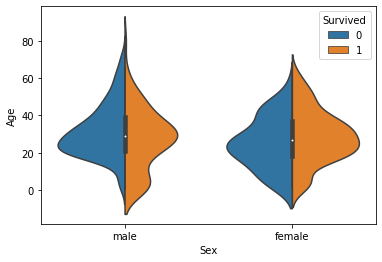

In [23]:
sns.violinplot(x="Sex", y="Age", data=titanic_train_df, hue="Survived", split=True )

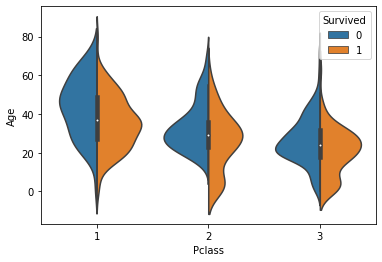

In [24]:
sns.violinplot(x="Pclass", y="Age", data=titanic_train_df, hue="Survived", split=True )

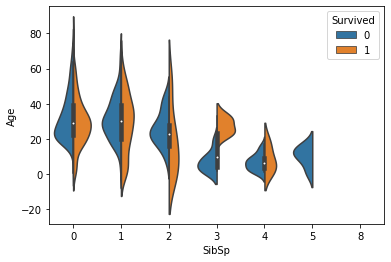

In [25]:
sns.violinplot(x="SibSp", y="Age", data=titanic_train_df, hue="Survived", split=True )

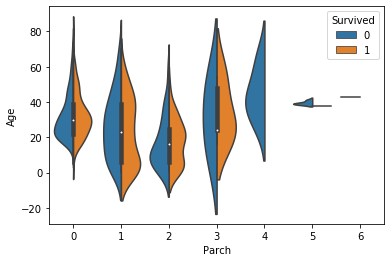

In [26]:
sns.violinplot(x="Parch", y="Age", data=titanic_train_df, hue="Survived", split=True )

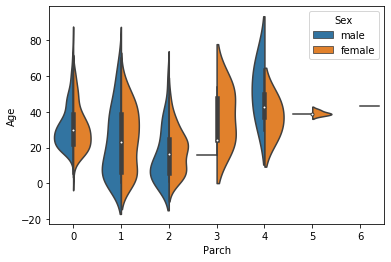

In [27]:
sns.violinplot(x="Parch", y="Age", data=titanic_train_df, hue="Sex", split=True )

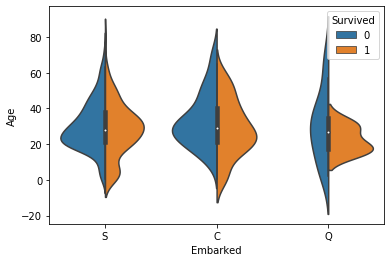

In [28]:
sns.violinplot(x="Embarked", y="Age", data=titanic_train_df, hue="Survived", split=True )

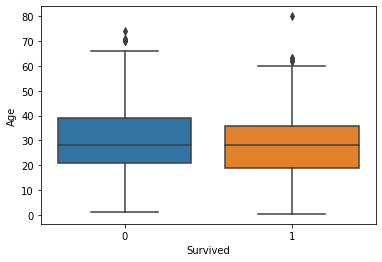

In [29]:
sns.boxplot(x='Survived', y='Age', data=titanic_train_df)

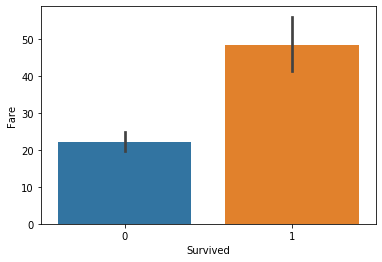

In [30]:
sns.barplot(x='Survived',y="Fare",data= titanic_train_df)

## Data Preprocessing

#### Missing data

In [31]:
#finding col with missing data
cols_with_missing = [col for col in titanic_train_df.columns
                    if titanic_train_df[col].isnull().any()]

print (cols_with_missing)

['Age', 'Cabin', 'Embarked']


In [32]:
total_missing_data = titanic_train_df.isnull().sum().sort_values(ascending=False)

percent = titanic_train_df.isnull().sum()/titanic_train_df.isnull().count()*100

missing_percent = (round(percent,1)).sort_values(ascending=False)

missing_data = pd.concat([total_missing_data, missing_percent], axis=1, keys=['Total', '%'])

print(missing_data)

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
Fare             0   0.0
Ticket           0   0.0
Parch            0   0.0
SibSp            0   0.0
Sex              0   0.0
Name             0   0.0
Pclass           0   0.0
Survived         0   0.0
PassengerId      0   0.0


In [33]:
total_test_missing_data = titanic_test_df.isnull().sum().sort_values(ascending=False)

test_percent = titanic_test_df.isnull().sum()/titanic_test_df.isnull().count()*100

test_missing_percent = (round(test_percent,1)).sort_values(ascending=False)

test_missing_data = pd.concat([total_test_missing_data, test_missing_percent], axis=1, keys=['Total', '%'])

print(test_missing_data)

             Total     %
Cabin          327  78.2
Age             86  20.6
Fare             1   0.2
Embarked         0   0.0
Ticket           0   0.0
Parch            0   0.0
SibSp            0   0.0
Sex              0   0.0
Name             0   0.0
Pclass           0   0.0
PassengerId      0   0.0


Three fields Cabin, Age,Embarked,and Fare(in the test data) contain missing data (i.e null enteries). To take care of missing data, 

#### Cabin


#### Age
To tackle missing data in age feild, i will replace missing fields with a random number that is generated based on the mean age value considering the standard deviation of the age distribution.

In [34]:
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    mean = titanic_train_df["Age"].mean()
    std = titanic_train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # generate random number around the mean +/- the std
    random_age = np.random.randint(mean - std, mean + std, size=is_null)
    
    #fill NAN values in age with random values
    age= dataset["Age"].copy()
    age[np.isnan(age)] = random_age
    dataset["Age"] = age
    
    dataset["Age"] = titanic_train_df["Age"].astype(int)
    
print (titanic_train_df["Age"].isnull().sum())
print (titanic_test_df["Age"].isnull().sum())
    

0
0


#### Embarked

Embarked is a categorical feature with only two missing values in the train dataset and non in the test dataset, therefore i will replace embarked with the most common category.

In [35]:
# obtain a description of emberked
titanic_train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

From the description above, 644 of the passengers onboard embarked at 'S', therefore i will replace the two missing value with 'S'

In [36]:
common_embarked = 'S'
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_embarked)
    
print (titanic_train_df["Embarked"].isnull().sum())
print (titanic_test_df["Embarked"].isnull().sum())

0
0


### Dealing with Categorical Values

In this section, i will take care of categorical i.e objects and float value. 

In [37]:
titanic_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


#### Fare

Below i will replace the missing value in fare (i.e the test dataset) with zero and convert the field to an integer field

In [38]:
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)
    

#### sex

In [39]:
genders = {"male": 0, "female": 1}
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset["Sex"] = dataset["Sex"].map(genders)

#### Embarked



In [40]:
ports = {"S": 0, "C" :1, "Q": 2}

full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset["Embarked"] = dataset["Embarked"].map(ports)

#### Age

In [41]:
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
titanic_train_df['Age'].value_counts()


6    168
4    165
5    137
3    136
2    120
1     97
0     68
Name: Age, dtype: int64

In [42]:
full_data = [titanic_train_df, titanic_test_df]

for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### Dropping Features

In [43]:
train_df = titanic_train_df.copy()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Cabin        204 non-null    object
 11  Embarked     891 non-null    int64 
dtypes: int32(2), int64(7), object(3)
memory usage: 76.7+ KB


In [44]:
test_df = titanic_test_df.copy()

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    int64 
dtypes: int32(2), int64(6), object(3)
memory usage: 32.8+ KB


In [45]:
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int32
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int32
 8   Embarked     891 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 55.8 KB


In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int32
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int32
 7   Embarked     418 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 23.0 KB


## Training the models

In [51]:
X = train_df.drop(["PassengerId","Survived"], axis=1).copy()
Y = train_df["Survived"]
X_test = test_df.drop(["PassengerId"], axis=1).copy()

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,1,0,0,0
1,1,1,5,1,0,3,1
2,3,1,3,0,0,0,0
3,1,1,5,1,0,3,0
4,3,0,5,0,0,1,0


In [54]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [58]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform (X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

log_reg_Prediction = log_reg.predict(X_valid)

log_reg_accuracy = round(log_reg.score(X_valid, Y_valid) *100, 2)

log_reg_accuracy

80.45

In [60]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

random_forest_prediction = random_forest.predict(X_valid)


random_forest_accuracy = round(random_forest.score(X_valid, Y_valid) * 100, 2)

random_forest_accuracy

84.36

### Testing

In [61]:
y_final = random_forest.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": titanic_test_df["PassengerId"],
        "Survived": y_final
    })
submission.head()
submission.to_csv('titanic.csv', index=False)